In [1]:
import numpy as np,pandas as pd
import os,pylab as pl,cv2

In [2]:
dir_name='../input/object-detection/'

In [3]:
file_list=sorted(os.listdir(dir_name))
files=[f for f in file_list 
       if f[-4:]=='.jpg']
print(files,len(files))

['IMG_20201019_214357.jpg'] 1


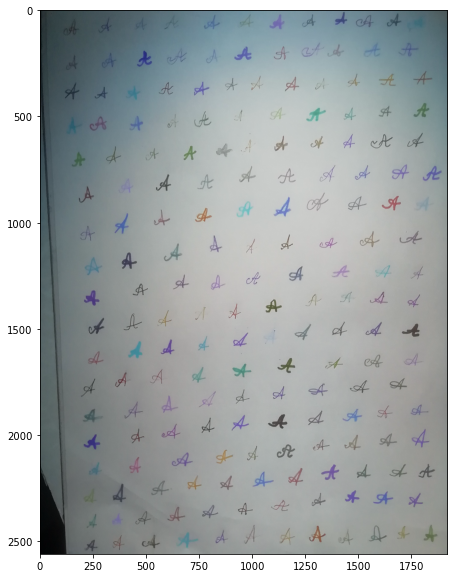

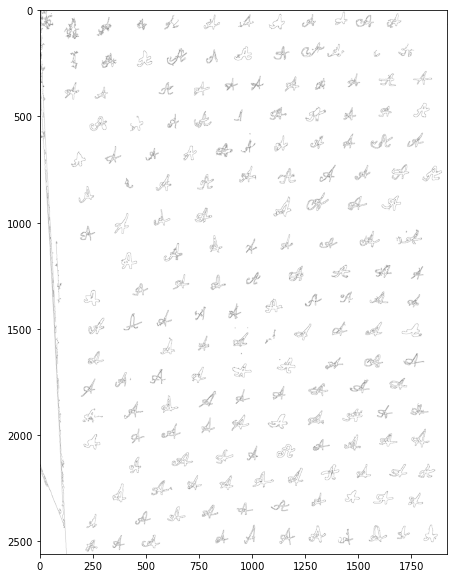

In [4]:
def get_edges(file):
    img=cv2.imread(file)
    fig=pl.figure(figsize=(10,10))
    pl.imshow(img,cmap='Greys'); pl.show()    
    gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    edges=cv2.Canny(gray_img,10,100) 
    cv2.waitKey(0)
    fig=pl.figure(figsize=(10,10))
    pl.imshow(edges,cmap='Greys'); pl.show()
    return img,gray_img,edges
img,gray_img,edges=get_edges(dir_name+files[0])

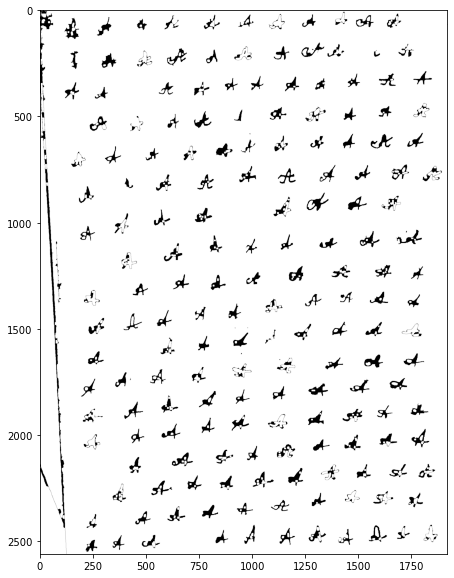

In [5]:
def get_closed(edges):
    kernel=cv2.getStructuringElement(cv2.MORPH_RECT,(7,7)) 
    closed=cv2.morphologyEx(edges,cv2.MORPH_CLOSE,kernel) 
    cv2.waitKey(0)
    fig=pl.figure(figsize=(10,10))
    pl.imshow(closed,cmap='Greys'); pl.show()
    return closed
closed=get_closed(edges)

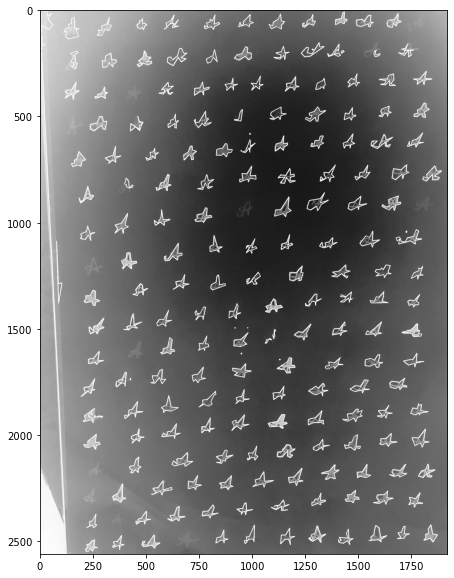

In [6]:
def get_contours(gray_img,closed):
    (contours, _)=cv2.findContours(
        closed.copy(),cv2.RETR_EXTERNAL,
        cv2.CHAIN_APPROX_SIMPLE)
    for c in contours: 
        arc=cv2.arcLength(c,True) 
        approx_pdp=cv2.approxPolyDP(c,.02*arc,True) 
        contours_img=cv2.drawContours(
            gray_img,[approx_pdp],-1,(0,255,0),2) 
    cv2.waitKey(0) 
    fig=pl.figure(figsize=(10,10))
    pl.imshow(contours_img,cmap='Greys'); pl.show()
    return contours,contours_img
contours,contours_img=get_contours(gray_img,closed)

In [7]:
idx=0 
for c in contours: 
    x,y,w,h=cv2.boundingRect(c)
    if w>30 and h>30: 
        new_img=img[y-3:y+h+3,
                    x-3:x+w+3]
        if min(new_img.shape[0],new_img.shape[1])>30:
            new_img=cv2.resize(new_img,(32,32))
            cv2.imwrite('01_00_00_%03d'%idx+'.png',
                        new_img)
        idx+=1 